In [2]:
import sys
import os

path = '/Users/romanriazantsev/Dev/gits/sign-pose'
os.chdir(path)
sys.path.insert(0, os.path.abspath(path))

import numpy as np
from utils.utils import to_numpy
from utils.fh_utils import *

In [3]:
base_path = '../../Datasets/FreiHAND_pub_v1'
mano_path = os.path.join(base_path, '%s_mano.json' % 'training')
mano_list = json_load(mano_path)

mano_array = np.array(mano_list).squeeze(1)
mano_poses = mano_array[..., :48]

In [4]:
xyz_path = os.path.join(base_path, '%s_xyz.json' % 'training')
xyz_list = json_load(xyz_path)

xyz_array = np.array(xyz_list).reshape(32560, 63)
print(xyz_array.shape)

(32560, 63)


In [5]:
K_path = os.path.join(base_path, '%s_K.json' % 'training')
K_list = json_load(K_path)
K_array = np.array(K_list)
print(K_array.shape)

(32560, 3, 3)


In [120]:
def get_uv():
    uv_dict = {}
    uv_list = []

    for idx, (xyz, K) in enumerate(zip(xyz_list, K_list)):
        uv = projectPoints(xyz, K)
        uv_dict[idx] = uv
        uv_list.append(uv)
        
    uv_array = np.array(uv_list)    
    return uv_dict, uv_array

uv_dict, uv_array = get_uv()

In [121]:
# def drop_element(arr, idx):
#     el = arr[idx]
#     new_arr = np.delete(arr, idx, 0)
#     return el, new_arr

# def find_nearest(arr, value):
#     idx = np.abs(arr - value).sum(axis=(1,2)).argmin()
#     return idx

# def sort_vectors(arr, init_idx, road_length):
#     indeces = np.arange(len(arr))
#     sorted_vectors = []
#     sorted_indeces = []
    
#     cur_val, arr = drop_element(arr, init_idx)
#     sorted_vectors.append(cur_val)
    
#     for i in range(road_length):
#         nxt_idx = find_nearest(arr, cur_val)
#         cur_val, arr = drop_element(arr, nxt_idx)
#         sorted_vectors.append(cur_val)
    
#     return sorted_vectors

In [122]:
def drop_element(vec_dict, key):
    new_dict = dict(vec_dict)
    val = new_dict[key]
    del new_dict[key]
    return val, new_dict

def get_nearest(vector, vec_dict):
    def get_distance(dict_item, vector=vector):
        _, val = dict_item
        return np.abs(val - vector).sum(axis=(0, 1))

    return min(vec_dict.items(), key=get_distance)

def sort_dict(vec_dict, init_idx, length):
    list_of_idxs = []
    cur_val, vec_dict = drop_element(vec_dict, init_idx)
    list_of_idxs.append(init_idx)
    
    for i in range(length):
        idx_of_nearest, nearest_vector = get_nearest(cur_val, vec_dict)
        list_of_idxs.append(idx_of_nearest)
        cur_val, vec_dict = drop_element(vec_dict, idx_of_nearest)
    
    return list_of_idxs

In [108]:
list_of_idxs = sort_dict(uv_dict, init_idx=0, length=100)

In [131]:
list_of_idxs[0], list_of_idxs[3]

(0, 5539)

In [33]:
indices = []

idx = np.where(uv_vectors == sorted_uv_vectors[0])
print(idx)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
        8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16,
       17, 17, 18, 18, 19, 19, 20, 20]), array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]))


In [123]:
from configs.config_m0 import CONFIG_M0
from datasets.frei_dataset_u0 import FreiHandDataset
from transforms.to_tensor_u0 import ToTensor

build_id = CONFIG_M0['build_id']

dataset = FreiHandDataset(
    CONFIG_M0['dataset_path'],
    CONFIG_M0['data_version'],
    transform=ToTensor()
)

Loading FreiHAND dataset index ...
Loading of 32560 samples done in 2.07 seconds


In [124]:
%matplotlib inline

In [125]:
import matplotlib.pyplot as plt

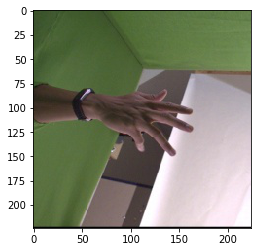

In [126]:
img_tensor = dataset[5538]['img']
img_np = to_numpy(img_tensor)
plt.imshow(img_np.transpose((1, 2, 0)))

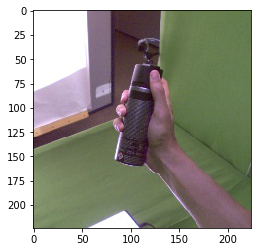

In [117]:
img_tensor = dataset[4332]['img']
img_np = to_numpy(img_tensor)
plt.imshow(img_np.transpose((1, 2, 0)))

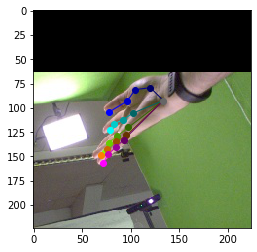

In [127]:
idx = 0

# uv_21x2 = np.array(uv_list).reshape(32560, 21, 2)
img_tensor = dataset[idx]['img']
img_np = to_numpy(img_tensor).transpose((1, 2, 0))

fig, ax = plt.subplots()
ax.imshow(img_np)
plot_hand(ax, uv_array[idx], order='uv')
plt.show()

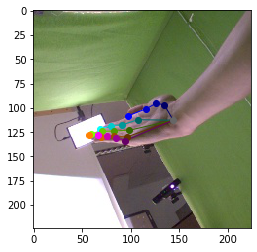

In [132]:
idx = 5539

# uv_21x2 = np.array(uv_list).reshape(32560, 21, 2)
img_tensor = dataset[idx]['img']
img_np = to_numpy(img_tensor).transpose((1, 2, 0))

fig, ax = plt.subplots()
ax.imshow(img_np)
plot_hand(ax, uv_array[idx], order='uv')
plt.show()

In [120]:
print('2740', uv_array[2740])
print('31520', uv_array[31520])

2740 [[156.5708491  131.58648983]
 [138.68022163 125.34806731]
 [121.9398284  116.24900346]
 [112.44231532 100.52071628]
 [ 96.79885996  86.39018114]
 [106.68631842 105.67041566]
 [ 91.30939031 103.07194502]
 [ 79.64300258 105.77785489]
 [ 68.56067869 101.56580425]
 [105.92729916 110.17760875]
 [ 91.17024733 110.44485354]
 [ 81.4901127  114.93710574]
 [ 73.83733817 110.25526162]
 [112.75363449 120.99794159]
 [ 97.3400729  117.35691733]
 [ 85.96509879 120.05875895]
 [ 75.05709161 115.45319831]
 [118.48170421 131.14815389]
 [107.89522842 131.55269416]
 [100.3927839  133.14864807]
 [ 94.15585488 129.4056526 ]]
31520 [[121.1687119  153.77187398]
 [108.42091378 139.95950883]
 [ 97.96397845 128.45616567]
 [ 89.07848106 110.14467171]
 [ 76.91241034  87.96367771]
 [126.72823036  98.44034366]
 [124.2993477   72.40757426]
 [107.72341364  65.57413292]
 [ 91.53737712  76.47269306]
 [132.09233037  90.91218536]
 [124.62485221  68.24995658]
 [106.20059588  68.07347678]
 [ 93.49072676  81.11597702]
 [

In [138]:
vectors_road[10]

[array([[153.19193392, 116.45206001],
        [140.79809878,  99.55436586],
        [132.34217414,  91.44953204],
        [125.60833023,  91.36245105],
        [117.48165752,  86.03955642],
        [115.94902627, 110.12238896],
        [101.85730348, 110.38418021],
        [ 91.36148805, 109.25403376],
        [ 81.9967444 , 110.30918546],
        [110.52294313, 122.67027025],
        [ 93.78095777, 122.07881994],
        [ 81.42623855, 122.59332171],
        [ 70.12890861, 124.23474751],
        [110.77329083, 132.98445731],
        [ 94.71696637, 132.14130565],
        [ 80.87316802, 133.60878536],
        [ 67.96216953, 133.25282418],
        [111.25637644, 139.96881714],
        [ 99.11999783, 141.12900113],
        [ 87.88127273, 141.80147726],
        [ 74.68659325, 142.38472958]]), 2740]

In [124]:
vectors_road[11]

[array([151.60847061, 110.87585667, 138.33653734,  93.76266944,
        130.36059205,  85.50149184, 123.17205309,  86.3368484 ,
        114.69886985,  82.49796493, 115.62490272, 106.81824774,
        103.27801967, 108.53470882,  93.94371264, 109.39491755,
         85.83854119, 111.75710733, 110.77132465, 120.34681339,
         94.37520787, 121.69891695,  82.22344464, 123.73297574,
         71.49460575, 126.6406157 , 110.83326915, 131.38037223,
         94.03281283, 132.56046789,  80.26313202, 136.60025633,
         66.80629698, 138.32596696, 111.04023191, 139.06716468,
         98.12747165, 141.38919539,  86.64223832, 143.83786929,
         73.29738465, 147.80922797]), 31520]